**Задание 22**. Разработать программу вычисления матрицы обратной заданной на основе метода Р-приведения.
Обосновать проектное решение (выбор алгоритма).
Обеспечить равномерную загрузку процессоров.
Результат вывести в текстовый файл.
Исследовать зависимость времени счета от размерности задачи и количества процессоров.

| Size | 5         | 9        | 10       |
| ---- | --------- | -------- | -------- |
| 100  | 0.035756  | 0.059843 | 0.074610 |
| 200  | 0.176273  | 0.188577 | 0.172876 |
| 400  | 0.399895  | 0.387635 | 0.398305 |
| 600  | 0.662537  | 0.630470 | 0.598711 |
| 800  | 2.113521  | 2.008406 | 1.975504 |
| 1000 | 2.953795  | 2.510276 | 2.335871 |
| 1200 | 4.009433  | 3.106348 | 2.982222 |
| 1400 | 5.031438  | 4.153259 | 4.083563 |
| 1600 | 7.229693  | 5.238271 | 5.379550 |
| 1800 | 10.216351 | 6.865048 | 7.306337 |
| 2000 | 13.199615 | 8.787762 | 8.662763 |



/home/volodya/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


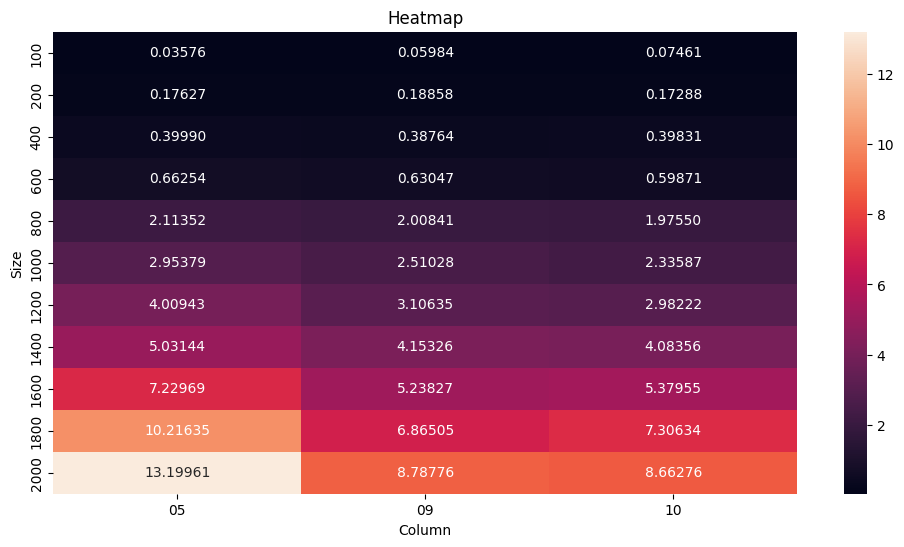

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем DataFrame из ваших данных
data = {
    'Size': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    '05': [0.035756, 0.176273, 0.399895, 0.662537, 2.113521, 2.953795, 4.009433, 5.031438, 7.229693, 10.216351, 13.199615],
    '09': [0.059843, 0.188577, 0.387635, 0.630470, 2.008406, 2.510276, 3.106348, 4.153259, 5.238271, 6.865048, 8.787762],
    '10': [0.07461, 0.172876, 0.398305, 0.598711, 1.975504, 2.335871, 2.982222, 4.083563, 5.37955, 7.306337, 8.662763]
}
df = pd.DataFrame(data)

# Преобразуем данные в формат, подходящий для построения heatmap
df_melted = df.melt(id_vars='Size', var_name='Column', value_name='Value')

# Строим тепловую карту
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df_melted.pivot(index='Size', columns='Column', values='Value'), annot=True, fmt=".5f")
ax.set_title('Heatmap')
plt.show()

In [2]:
import pandas as pd

def md_to_pd(markdown_table):
    # Step 1: Split the text into rows
    rows = markdown_table.strip().split('\n')

    # Step 2: Extract column names from the first row
    column_names = rows[0].strip('|').strip().split('|')
    column_names = [name.strip() for name in column_names]

    # print(column_names)
    # Step 3: Extract data from each row starting from the second row
    data = []
    for row in rows[2:]:
        # Remove leading and trailing pipes, then split by pipe character
        values = row.strip('|').strip().split('|')
        
        # Strip whitespace from each value
        values = [value.strip() for value in values]
        
        # Convert numeric strings to floats where applicable
        try:
            values = [float(value) if value else None for value in values]
            values = [int(value) if value == int(value) else value for value in values]
        except ValueError:
            pass

        
        data.append(values)

    # Step 4: Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame(data, columns=column_names)
    return df


mf = open("./ppp_out/slurm-20599.out")
mf.readline()
markdown_table = mf.read()
df = md_to_pd(markdown_table).query("Size > 10")

for i in range(20589, 20599):
    try: 
        mf = open("./ppp_out/slurm-{:}.out".format(i))
        mf.readline()
        markdown_table = mf.read()

        df = pd.concat([df, md_to_pd(markdown_table).query("Size > 10")], ignore_index=True)
        df.append()
    except:
        pass    



from IPython.display import display, Math, Latex, Markdown

display(Markdown(df.pivot(index='Size', columns='PC', values='Time').to_markdown()))
print(df.pivot(index='Size', columns='PC', values='Time').to_latex())

|   Size |         1 |         2 |         3 |         4 |         5 |         6 |         7 |        8 |        9 |       10 |
|-------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|---------:|---------:|
|    100 |  0.006394 |  0.023182 |  0.024991 |  0.031666 |  0.033614 |  0.080891 |  0.084673 | 0.044982 | 0.088079 | 0.042614 |
|    200 |  0.049006 |  0.068286 |  0.064159 |  0.079661 |  0.064122 |  0.076203 |  0.080593 | 0.101212 | 0.079212 | 0.093207 |
|    400 |  0.380923 |  0.296383 |  0.23786  |  0.249735 |  0.200218 |  0.219445 |  0.224407 | 0.242144 | 0.216766 | 0.236721 |
|    600 |  1.28337  |  0.808884 |  0.631441 |  0.677362 |  0.557427 |  0.476089 |  0.504791 | 0.552051 | 0.519817 | 0.518482 |
|    800 |  3.01492  |  2.81906  |  1.37903  |  2.24927  |  2.24755  |  1.96158  |  1.05344  | 1.05646  | 2.24082  | 2.10216  |
|   1000 |  5.88123  |  3.35562  |  2.37201  |  3.12721  |  2.88784  |  2.74676  |  2.7091   | 2.11926  | 2.46121  | 2.47662  |
|   1200 | 10.5173   |  5.65234  |  3.93687  |  4.1291   |  4.09964  |  3.70942  |  3.44091  | 2.71961  | 3.33405  | 3.16897  |
|   1400 | 16.7337   |  9.08138  |  6.13656  |  5.08584  |  5.25734  |  5.03406  |  4.65506  | 3.64063  | 4.5631   | 4.25697  |
|   1600 | 25.4033   | 13.5625   |  9.20356  |  7.37683  |  7.25352  |  6.3816   |  6.08608  | 5.28101  | 5.27691  | 5.21334  |
|   1800 | 35.814    | 19.422    | 13.2437   | 11.2989   | 10.014    |  8.17851  |  8.18132  | 7.57751  | 7.30103  | 6.78376  |
|   2000 | 49.3246   | 26.5586   | 18.0766   | 14.4252   | 12.5011   | 11.9355   | 10.2482   | 9.48142  | 9.10615  | 8.23785  |

\begin{tabular}{lrrrrrrrrrr}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 0.006394 & 0.023182 & 0.024991 & 0.031666 & 0.033614 & 0.080891 & 0.084673 & 0.044982 & 0.088079 & 0.042614 \\
200 & 0.049006 & 0.068286 & 0.064159 & 0.079661 & 0.064122 & 0.076203 & 0.080593 & 0.101212 & 0.079212 & 0.093207 \\
400 & 0.380923 & 0.296383 & 0.237860 & 0.249735 & 0.200218 & 0.219445 & 0.224407 & 0.242144 & 0.216766 & 0.236721 \\
600 & 1.283368 & 0.808884 & 0.631441 & 0.677362 & 0.557427 & 0.476089 & 0.504791 & 0.552051 & 0.519817 & 0.518482 \\
800 & 3.014916 & 2.819056 & 1.379033 & 2.249270 & 2.247548 & 1.961575 & 1.053437 & 1.056456 & 2.240817 & 2.102161 \\
1000 & 5.881229 & 3.355625 & 2.372011 & 3.127212 & 2.887842 & 2.746757 & 2.709100 & 2.119264 & 2.461212 & 2.476617 \\
1200 & 10.517283 & 5.652336 & 3.936872 & 4.129103 & 4.099637 & 3.709419 & 3.440915 & 2.719612 & 3.334045 & 3.168967 \\
1400 & 16.733725 & 9.081385 & 6.136562 & 5.085

In [3]:
df_pc1 = df.query("PC == 1")

# display(df_pc1)
# Шаг 2: Вычисляем новые значения для S

df['S'] = df.apply(lambda row: df_pc1.query(f"Size == {row['Size']}")['Time'].values[0] / row['Time'], axis=1)
df['E'] = df.apply(lambda row: row['S'] / row['PC'], axis=1)



print("Time")
display(Markdown(df.pivot(index='Size', columns='PC', values='Time').to_markdown()))

print("S")
display(Markdown(df.pivot(index='Size', columns='PC', values='S').to_markdown()))

print("E")
display(Markdown(df.pivot(index='Size', columns='PC', values='E').to_markdown()))

display(Markdown(df.to_markdown()))




Time


|   Size |         1 |         2 |         3 |         4 |         5 |         6 |         7 |        8 |        9 |       10 |
|-------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|---------:|---------:|
|    100 |  0.006394 |  0.023182 |  0.024991 |  0.031666 |  0.033614 |  0.080891 |  0.084673 | 0.044982 | 0.088079 | 0.042614 |
|    200 |  0.049006 |  0.068286 |  0.064159 |  0.079661 |  0.064122 |  0.076203 |  0.080593 | 0.101212 | 0.079212 | 0.093207 |
|    400 |  0.380923 |  0.296383 |  0.23786  |  0.249735 |  0.200218 |  0.219445 |  0.224407 | 0.242144 | 0.216766 | 0.236721 |
|    600 |  1.28337  |  0.808884 |  0.631441 |  0.677362 |  0.557427 |  0.476089 |  0.504791 | 0.552051 | 0.519817 | 0.518482 |
|    800 |  3.01492  |  2.81906  |  1.37903  |  2.24927  |  2.24755  |  1.96158  |  1.05344  | 1.05646  | 2.24082  | 2.10216  |
|   1000 |  5.88123  |  3.35562  |  2.37201  |  3.12721  |  2.88784  |  2.74676  |  2.7091   | 2.11926  | 2.46121  | 2.47662  |
|   1200 | 10.5173   |  5.65234  |  3.93687  |  4.1291   |  4.09964  |  3.70942  |  3.44091  | 2.71961  | 3.33405  | 3.16897  |
|   1400 | 16.7337   |  9.08138  |  6.13656  |  5.08584  |  5.25734  |  5.03406  |  4.65506  | 3.64063  | 4.5631   | 4.25697  |
|   1600 | 25.4033   | 13.5625   |  9.20356  |  7.37683  |  7.25352  |  6.3816   |  6.08608  | 5.28101  | 5.27691  | 5.21334  |
|   1800 | 35.814    | 19.422    | 13.2437   | 11.2989   | 10.014    |  8.17851  |  8.18132  | 7.57751  | 7.30103  | 6.78376  |
|   2000 | 49.3246   | 26.5586   | 18.0766   | 14.4252   | 12.5011   | 11.9355   | 10.2482   | 9.48142  | 9.10615  | 8.23785  |

S


|   Size |   1 |        2 |        3 |        4 |        5 |         6 |        7 |        8 |         9 |       10 |
|-------:|----:|---------:|---------:|---------:|---------:|----------:|---------:|---------:|----------:|---------:|
|    100 |   1 | 0.275817 | 0.255852 | 0.20192  | 0.190218 | 0.0790446 | 0.075514 | 0.142146 | 0.0725939 | 0.150045 |
|    200 |   1 | 0.717658 | 0.763821 | 0.615182 | 0.764262 | 0.643098  | 0.608068 | 0.484192 | 0.618669  | 0.525776 |
|    400 |   1 | 1.28524  | 1.60146  | 1.52531  | 1.90254  | 1.73585   | 1.69746  | 1.57313  | 1.7573    | 1.60916  |
|    600 |   1 | 1.58659  | 2.03244  | 1.89466  | 2.30231  | 2.69565   | 2.54237  | 2.32473  | 2.46888   | 2.47524  |
|    800 |   1 | 1.06948  | 2.18625  | 1.3404   | 1.34142  | 1.53699   | 2.86198  | 2.8538   | 1.34545   | 1.4342   |
|   1000 |   1 | 1.75265  | 2.47943  | 1.88066  | 2.03655  | 2.14115   | 2.17092  | 2.77513  | 2.38957   | 2.3747   |
|   1200 |   1 | 1.8607   | 2.67148  | 2.54711  | 2.56542  | 2.83529   | 3.05654  | 3.8672   | 3.15451   | 3.31884  |
|   1400 |   1 | 1.84264  | 2.72689  | 3.29026  | 3.18293  | 3.3241    | 3.59474  | 4.59638  | 3.66718   | 3.9309   |
|   1600 |   1 | 1.87306  | 2.76016  | 3.44366  | 3.50221  | 3.98072   | 4.174    | 4.81032  | 4.81405   | 4.87276  |
|   1800 |   1 | 1.84399  | 2.70423  | 3.16968  | 3.57638  | 4.37904   | 4.37753  | 4.72636  | 4.90533   | 5.27938  |
|   2000 |   1 | 1.8572   | 2.72865  | 3.41933  | 3.94561  | 4.13261   | 4.81302  | 5.20225  | 5.41663   | 5.98756  |

E


|   Size |   1 |        2 |        3 |        4 |         5 |         6 |         7 |         8 |          9 |        10 |
|-------:|----:|---------:|---------:|---------:|----------:|----------:|----------:|----------:|-----------:|----------:|
|    100 |   1 | 0.137909 | 0.085284 | 0.05048  | 0.0380437 | 0.0131741 | 0.0107877 | 0.0177682 | 0.00806599 | 0.0150045 |
|    200 |   1 | 0.358829 | 0.254607 | 0.153795 | 0.152852  | 0.107183  | 0.0868668 | 0.0605239 | 0.068741   | 0.0525776 |
|    400 |   1 | 0.64262  | 0.53382  | 0.381327 | 0.380508  | 0.289308  | 0.242495  | 0.196641  | 0.195256   | 0.160916  |
|    600 |   1 | 0.793295 | 0.677481 | 0.473664 | 0.460461  | 0.449275  | 0.363196  | 0.290591  | 0.27432    | 0.247524  |
|    800 |   1 | 0.534739 | 0.728751 | 0.335099 | 0.268285  | 0.256165  | 0.408854  | 0.356725  | 0.149495   | 0.14342   |
|   1000 |   1 | 0.876324 | 0.826476 | 0.470166 | 0.40731   | 0.356859  | 0.310131  | 0.346891  | 0.265507   | 0.23747   |
|   1200 |   1 | 0.930348 | 0.890494 | 0.636778 | 0.513084  | 0.472549  | 0.436648  | 0.4834    | 0.350501   | 0.331884  |
|   1400 |   1 | 0.92132  | 0.908963 | 0.822564 | 0.636585  | 0.554016  | 0.513534  | 0.574547  | 0.407465   | 0.39309   |
|   1600 |   1 | 0.936531 | 0.920054 | 0.860916 | 0.700441  | 0.663453  | 0.596286  | 0.60129   | 0.534895   | 0.487276  |
|   1800 |   1 | 0.921995 | 0.901411 | 0.792421 | 0.715275  | 0.72984   | 0.625362  | 0.590795  | 0.545037   | 0.527938  |
|   2000 |   1 | 0.9286   | 0.909549 | 0.854832 | 0.789122  | 0.688768  | 0.687575  | 0.650281  | 0.601848   | 0.598756  |

|     |      Time |   Size |       Error |   PC |         S |          E |
|----:|----------:|-------:|------------:|-----:|----------:|-----------:|
|   0 |  0.042614 |    100 | 6.11463e-14 |   10 | 0.150045  | 0.0150045  |
|   1 |  0.093207 |    200 | 2.5308e-12  |   10 | 0.525776  | 0.0525776  |
|   2 |  0.236721 |    400 | 6.2655e-13  |   10 | 1.60916   | 0.160916   |
|   3 |  0.518482 |    600 | 8.53539e-12 |   10 | 2.47524   | 0.247524   |
|   4 |  2.10216  |    800 | 1.32087e-11 |   10 | 1.4342    | 0.14342    |
|   5 |  2.47662  |   1000 | 1.46037e-11 |   10 | 2.3747    | 0.23747    |
|   6 |  3.16897  |   1200 | 1.40509e-11 |   10 | 3.31884   | 0.331884   |
|   7 |  4.25697  |   1400 | 8.42151e-11 |   10 | 3.9309    | 0.39309    |
|   8 |  5.21334  |   1600 | 2.09646e-11 |   10 | 4.87276   | 0.487276   |
|   9 |  6.78376  |   1800 | 1.88176e-11 |   10 | 5.27938   | 0.527938   |
|  10 |  8.23785  |   2000 | 6.82216e-11 |   10 | 5.98756   | 0.598756   |
|  11 |  0.088079 |    100 | 6.11463e-14 |    9 | 0.0725939 | 0.00806599 |
|  12 |  0.079212 |    200 | 2.5308e-12  |    9 | 0.618669  | 0.068741   |
|  13 |  0.216766 |    400 | 6.2655e-13  |    9 | 1.7573    | 0.195256   |
|  14 |  0.519817 |    600 | 8.53539e-12 |    9 | 2.46888   | 0.27432    |
|  15 |  2.24082  |    800 | 1.32087e-11 |    9 | 1.34545   | 0.149495   |
|  16 |  2.46121  |   1000 | 1.46037e-11 |    9 | 2.38957   | 0.265507   |
|  17 |  3.33405  |   1200 | 1.40509e-11 |    9 | 3.15451   | 0.350501   |
|  18 |  4.5631   |   1400 | 8.42151e-11 |    9 | 3.66718   | 0.407465   |
|  19 |  5.27691  |   1600 | 2.09646e-11 |    9 | 4.81405   | 0.534895   |
|  20 |  7.30103  |   1800 | 1.88176e-11 |    9 | 4.90533   | 0.545037   |
|  21 |  9.10615  |   2000 | 6.82216e-11 |    9 | 5.41663   | 0.601848   |
|  22 |  0.044982 |    100 | 6.11463e-14 |    8 | 0.142146  | 0.0177682  |
|  23 |  0.101212 |    200 | 2.5308e-12  |    8 | 0.484192  | 0.0605239  |
|  24 |  0.242144 |    400 | 6.2655e-13  |    8 | 1.57313   | 0.196641   |
|  25 |  0.552051 |    600 | 8.53539e-12 |    8 | 2.32473   | 0.290591   |
|  26 |  1.05646  |    800 | 1.32087e-11 |    8 | 2.8538    | 0.356725   |
|  27 |  2.11926  |   1000 | 1.46037e-11 |    8 | 2.77513   | 0.346891   |
|  28 |  2.71961  |   1200 | 1.40509e-11 |    8 | 3.8672    | 0.4834     |
|  29 |  3.64063  |   1400 | 8.42151e-11 |    8 | 4.59638   | 0.574547   |
|  30 |  5.28101  |   1600 | 2.09646e-11 |    8 | 4.81032   | 0.60129    |
|  31 |  7.57751  |   1800 | 1.88176e-11 |    8 | 4.72636   | 0.590795   |
|  32 |  9.48142  |   2000 | 6.82216e-11 |    8 | 5.20225   | 0.650281   |
|  33 |  0.084673 |    100 | 6.11463e-14 |    7 | 0.075514  | 0.0107877  |
|  34 |  0.080593 |    200 | 2.5308e-12  |    7 | 0.608068  | 0.0868668  |
|  35 |  0.224407 |    400 | 6.2655e-13  |    7 | 1.69746   | 0.242495   |
|  36 |  0.504791 |    600 | 8.53539e-12 |    7 | 2.54237   | 0.363196   |
|  37 |  1.05344  |    800 | 1.32087e-11 |    7 | 2.86198   | 0.408854   |
|  38 |  2.7091   |   1000 | 1.46037e-11 |    7 | 2.17092   | 0.310131   |
|  39 |  3.44091  |   1200 | 1.40509e-11 |    7 | 3.05654   | 0.436648   |
|  40 |  4.65506  |   1400 | 8.42151e-11 |    7 | 3.59474   | 0.513534   |
|  41 |  6.08608  |   1600 | 2.09646e-11 |    7 | 4.174     | 0.596286   |
|  42 |  8.18132  |   1800 | 1.88176e-11 |    7 | 4.37753   | 0.625362   |
|  43 | 10.2482   |   2000 | 6.82216e-11 |    7 | 4.81302   | 0.687575   |
|  44 |  0.080891 |    100 | 6.11463e-14 |    6 | 0.0790446 | 0.0131741  |
|  45 |  0.076203 |    200 | 2.5308e-12  |    6 | 0.643098  | 0.107183   |
|  46 |  0.219445 |    400 | 6.2655e-13  |    6 | 1.73585   | 0.289308   |
|  47 |  0.476089 |    600 | 8.53539e-12 |    6 | 2.69565   | 0.449275   |
|  48 |  1.96158  |    800 | 1.32087e-11 |    6 | 1.53699   | 0.256165   |
|  49 |  2.74676  |   1000 | 1.46037e-11 |    6 | 2.14115   | 0.356859   |
|  50 |  3.70942  |   1200 | 1.40509e-11 |    6 | 2.83529   | 0.472549   |
|  51 |  5.03406  |   1400 | 8.42151e-11 |    6 | 3.3241    | 0.554016   |
|  52 |  6.3816   |   1600 | 2.09646e-11 |    6 | 3.98072   | 0.663453   |
|  53 |  8.17851  |   1800 | 1.88176e-11 |    6 | 4.37904   | 0.72984    |
|  54 | 11.9355   |   2000 | 6.82216e-11 |    6 | 4.13261   | 0.688768   |
|  55 |  0.033614 |    100 | 6.11463e-14 |    5 | 0.190218  | 0.0380437  |
|  56 |  0.064122 |    200 | 2.5308e-12  |    5 | 0.764262  | 0.152852   |
|  57 |  0.200218 |    400 | 6.2655e-13  |    5 | 1.90254   | 0.380508   |
|  58 |  0.557427 |    600 | 8.53539e-12 |    5 | 2.30231   | 0.460461   |
|  59 |  2.24755  |    800 | 1.32087e-11 |    5 | 1.34142   | 0.268285   |
|  60 |  2.88784  |   1000 | 1.46037e-11 |    5 | 2.03655   | 0.40731    |
|  61 |  4.09964  |   1200 | 1.40509e-11 |    5 | 2.56542   | 0.513084   |
|  62 |  5.25734  |   1400 | 8.42151e-11 |    5 | 3.18293   | 0.636585   |
|  63 |  7.25352  |   1600 | 2.09646e-11 |    5 | 3.50221   | 0.700441   |
|  64 | 10.014    |   1800 | 1.88176e-11 |    5 | 3.57638   | 0.715275   |
|  65 | 12.5011   |   2000 | 6.82216e-11 |    5 | 3.94561   | 0.789122   |
|  66 |  0.031666 |    100 | 6.11463e-14 |    4 | 0.20192   | 0.05048    |
|  67 |  0.079661 |    200 | 2.5308e-12  |    4 | 0.615182  | 0.153795   |
|  68 |  0.249735 |    400 | 6.2655e-13  |    4 | 1.52531   | 0.381327   |
|  69 |  0.677362 |    600 | 8.53539e-12 |    4 | 1.89466   | 0.473664   |
|  70 |  2.24927  |    800 | 1.32087e-11 |    4 | 1.3404    | 0.335099   |
|  71 |  3.12721  |   1000 | 1.46037e-11 |    4 | 1.88066   | 0.470166   |
|  72 |  4.1291   |   1200 | 1.40509e-11 |    4 | 2.54711   | 0.636778   |
|  73 |  5.08584  |   1400 | 8.42151e-11 |    4 | 3.29026   | 0.822564   |
|  74 |  7.37683  |   1600 | 2.09646e-11 |    4 | 3.44366   | 0.860916   |
|  75 | 11.2989   |   1800 | 1.88176e-11 |    4 | 3.16968   | 0.792421   |
|  76 | 14.4252   |   2000 | 6.82216e-11 |    4 | 3.41933   | 0.854832   |
|  77 |  0.024991 |    100 | 6.11463e-14 |    3 | 0.255852  | 0.085284   |
|  78 |  0.064159 |    200 | 2.5308e-12  |    3 | 0.763821  | 0.254607   |
|  79 |  0.23786  |    400 | 6.2655e-13  |    3 | 1.60146   | 0.53382    |
|  80 |  0.631441 |    600 | 8.53539e-12 |    3 | 2.03244   | 0.677481   |
|  81 |  1.37903  |    800 | 1.32087e-11 |    3 | 2.18625   | 0.728751   |
|  82 |  2.37201  |   1000 | 1.46037e-11 |    3 | 2.47943   | 0.826476   |
|  83 |  3.93687  |   1200 | 1.40509e-11 |    3 | 2.67148   | 0.890494   |
|  84 |  6.13656  |   1400 | 8.42151e-11 |    3 | 2.72689   | 0.908963   |
|  85 |  9.20356  |   1600 | 2.09646e-11 |    3 | 2.76016   | 0.920054   |
|  86 | 13.2437   |   1800 | 1.88176e-11 |    3 | 2.70423   | 0.901411   |
|  87 | 18.0766   |   2000 | 6.82216e-11 |    3 | 2.72865   | 0.909549   |
|  88 |  0.023182 |    100 | 6.11463e-14 |    2 | 0.275817  | 0.137909   |
|  89 |  0.068286 |    200 | 2.5308e-12  |    2 | 0.717658  | 0.358829   |
|  90 |  0.296383 |    400 | 6.2655e-13  |    2 | 1.28524   | 0.64262    |
|  91 |  0.808884 |    600 | 8.53539e-12 |    2 | 1.58659   | 0.793295   |
|  92 |  2.81906  |    800 | 1.32087e-11 |    2 | 1.06948   | 0.534739   |
|  93 |  3.35562  |   1000 | 1.46037e-11 |    2 | 1.75265   | 0.876324   |
|  94 |  5.65234  |   1200 | 1.40509e-11 |    2 | 1.8607    | 0.930348   |
|  95 |  9.08138  |   1400 | 8.42151e-11 |    2 | 1.84264   | 0.92132    |
|  96 | 13.5625   |   1600 | 2.09646e-11 |    2 | 1.87306   | 0.936531   |
|  97 | 19.422    |   1800 | 1.88176e-11 |    2 | 1.84399   | 0.921995   |
|  98 | 26.5586   |   2000 | 6.82216e-11 |    2 | 1.8572    | 0.9286     |
|  99 |  0.006394 |    100 | 0.0151787   |    1 | 1         | 1          |
| 100 |  0.049006 |    200 | 0.0088713   |    1 | 1         | 1          |
| 101 |  0.380923 |    400 | 0.010984    |    1 | 1         | 1          |
| 102 |  1.28337  |    600 | 0.00281236  |    1 | 1         | 1          |
| 103 |  3.01492  |    800 | 0.00864918  |    1 | 1         | 1          |
| 104 |  5.88123  |   1000 | 0.00204463  |    1 | 1         | 1          |
| 105 | 10.5173   |   1200 | 0.00625005  |    1 | 1         | 1          |
| 106 | 16.7337   |   1400 | 0.00309417  |    1 | 1         | 1          |
| 107 | 25.4033   |   1600 | 0.00148161  |    1 | 1         | 1          |
| 108 | 35.814    |   1800 | 0.00190948  |    1 | 1         | 1          |
| 109 | 49.3246   |   2000 | 0.00191338  |    1 | 1         | 1          |

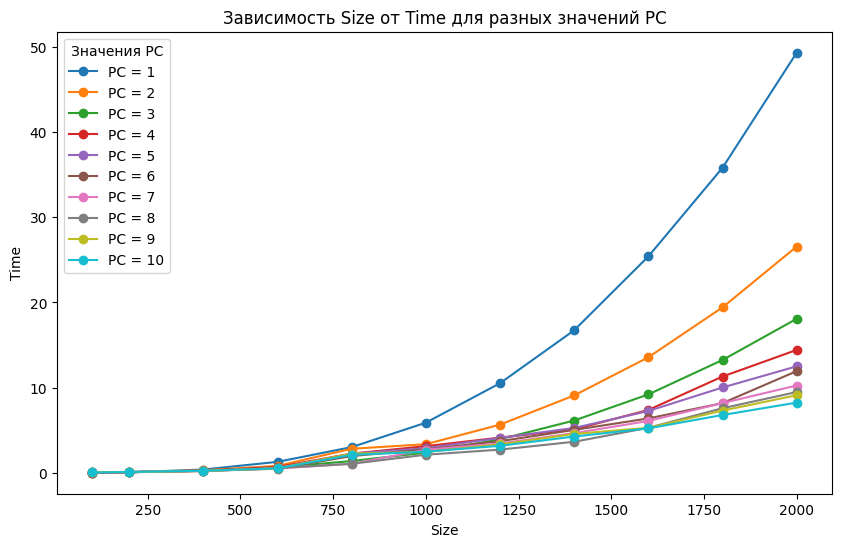

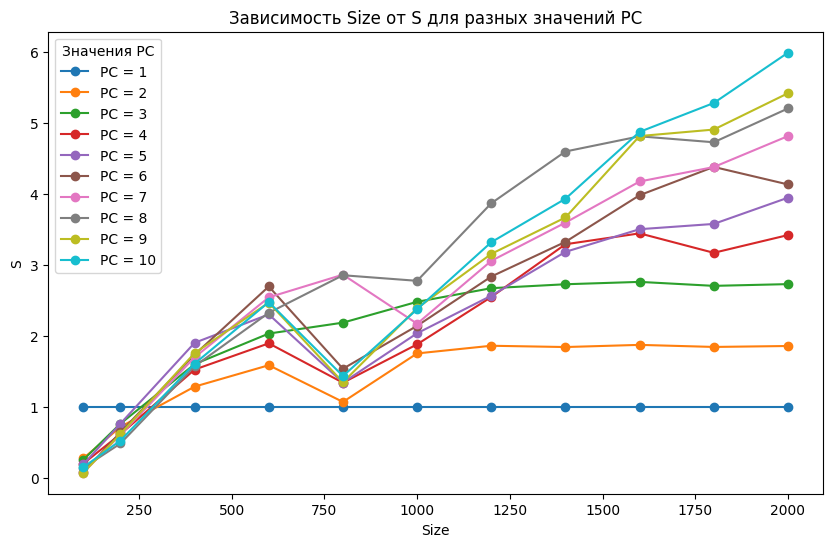

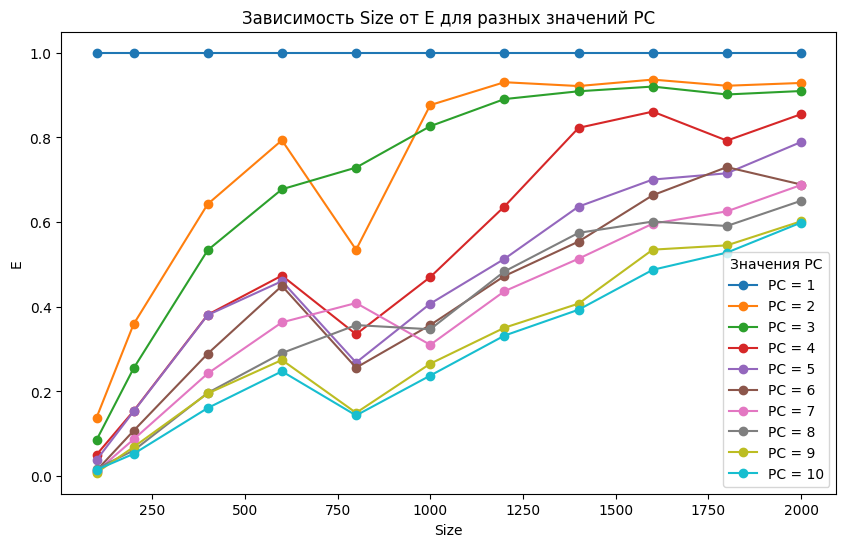

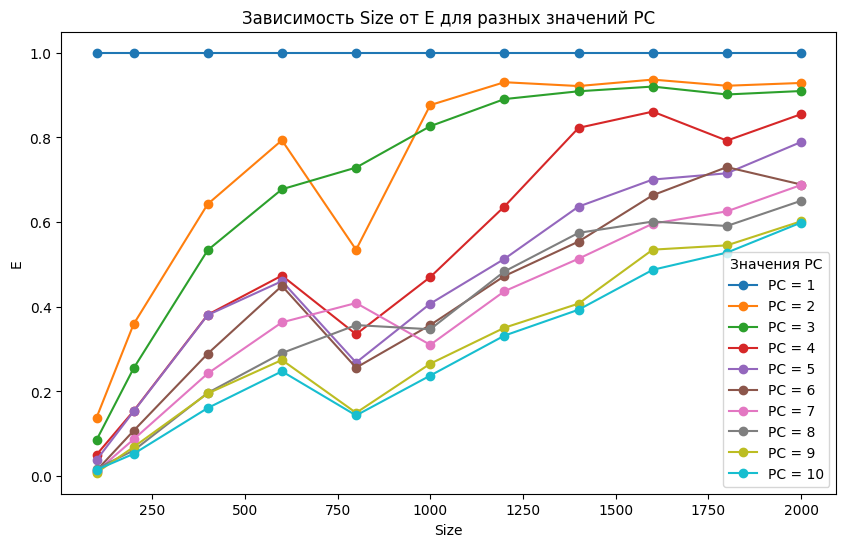

In [4]:
def plot_axis(name):
    # Создание фигуры и оси
    fig, ax = plt.subplots(figsize=(10, 6))

    # Цикл по каждому уникальному значению PC
    for pc in range(1,11):
        # Фильтрация данных по текущему значению PC
        subset = df.query(f'PC == {pc}')
        
        # Построение линии для текущего PC
        ax.plot(subset['Size'], subset[name], marker='o', linestyle='-', label=f'PC = {pc}')

    # Настройка подписей и легенды
    # ax.set_yscale('log')
    ax.set_xlabel('Size')
    ax.set_ylabel(name)
    ax.legend(title='Значения PC')

    # Название графика
    plt.title('Зависимость Size от ' + name + ' для разных значений PC')

    # Показ графика
    plt.show()
    return fig

f = plot_axis('Time')

f.savefig("test.svg", format="svg")

plot_axis('S')
plot_axis('E')


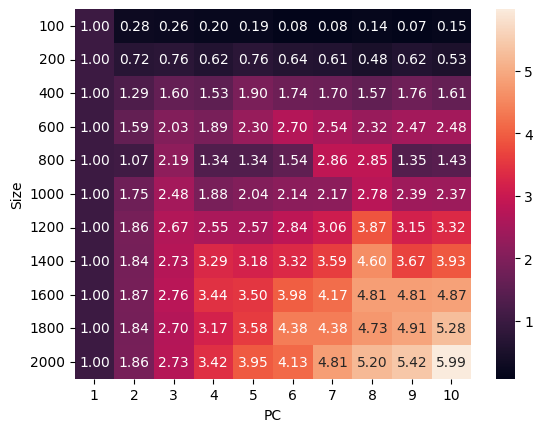

In [5]:
sns.heatmap(df.pivot(index='Size', columns='PC', values='S'), annot=True, fmt=".2f")
plt.savefig("heatmap_s.svg", format="svg", bbox_inches='tight')

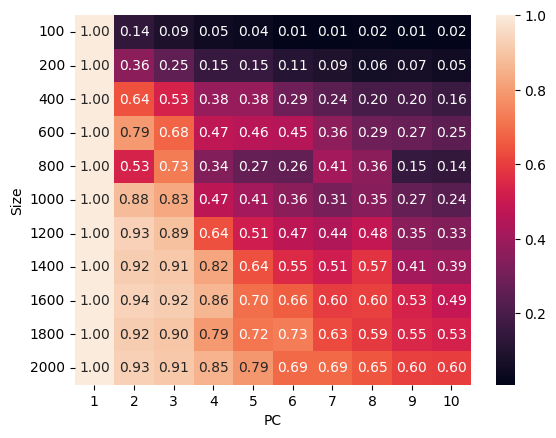

In [6]:
sns.heatmap(df.pivot(index='Size', columns='PC', values='E'), annot=True, fmt=".2f")
plt.savefig("heatmap_e.svg", format="svg", bbox_inches='tight')

In [7]:
def create_table_for_size(df, size):
    # Фильтруем строки, соответствующие указанному размеру
    filtered_df = df.query(f"Size == {size}")
    
    grouped_df = filtered_df[['PC','Time', 'S', 'E']].reset_index()
    
    # Переставляем столбцы, чтобы 'PC' оказался первым
    columns_order = ['PC', 'Time', 'S', 'E']
    grouped_df = grouped_df.reindex(columns=columns_order)
    
    # Транспонируем DataFrame
    transformed_df = grouped_df.set_index('PC').T
    
    return transformed_df



display(create_table_for_size(df, 100))
display(create_table_for_size(df, 1000))
display(create_table_for_size(df, 2000))


# Функция для форматирования чисел до трех знаков после запятой
def format_floats(df):
    for col in df.columns:
        if isinstance(col, float) or isinstance(col, int):
            df[col] = df[col].map(lambda x: f"{x:.3f}")
    return df


print(format_floats(create_table_for_size(df, 100)).to_latex())
print(format_floats(create_table_for_size(df, 1000)).to_latex())
print(format_floats(create_table_for_size(df, 2000)).to_latex())

PC,10,9,8,7,6,5,4,3,2,1
Time,0.042614,0.088079,0.044982,0.084673,0.080891,0.033614,0.031666,0.024991,0.023182,0.006394
S,0.150045,0.072594,0.142146,0.075514,0.079045,0.190218,0.201920,0.255852,0.275817,1.000000
E,0.015004,0.008066,0.017768,0.010788,0.013174,0.038044,0.050480,0.085284,0.137909,1.000000


PC,10,9,8,7,6,5,4,3,2,1
Time,2.476617,2.461212,2.119264,2.709100,2.746757,2.887842,3.127212,2.372011,3.355625,5.881229
S,2.374703,2.389566,2.775128,2.170916,2.141154,2.036548,1.880662,2.479427,1.752648,1.000000
E,0.237470,0.265507,0.346891,0.310131,0.356859,0.407310,0.470166,0.826476,0.876324,1.000000


PC,10,9,8,7,6,5,4,3,2,1
Time,8.237849,9.106154,9.481416,10.248162,11.935479,12.501144,14.425246,18.076599,26.558611,49.32465
S,5.987564,5.416628,5.202245,4.813024,4.132607,3.945611,3.419328,2.728647,1.857200,1.00000
E,0.598756,0.601848,0.650281,0.687575,0.688768,0.789122,0.854832,0.909549,0.928600,1.00000


\begin{tabular}{lllllllllll}
\toprule
PC & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1 \\
\midrule
Time & 0.043 & 0.088 & 0.045 & 0.085 & 0.081 & 0.034 & 0.032 & 0.025 & 0.023 & 0.006 \\
S & 0.150 & 0.073 & 0.142 & 0.076 & 0.079 & 0.190 & 0.202 & 0.256 & 0.276 & 1.000 \\
E & 0.015 & 0.008 & 0.018 & 0.011 & 0.013 & 0.038 & 0.050 & 0.085 & 0.138 & 1.000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllllllll}
\toprule
PC & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1 \\
\midrule
Time & 2.477 & 2.461 & 2.119 & 2.709 & 2.747 & 2.888 & 3.127 & 2.372 & 3.356 & 5.881 \\
S & 2.375 & 2.390 & 2.775 & 2.171 & 2.141 & 2.037 & 1.881 & 2.479 & 1.753 & 1.000 \\
E & 0.237 & 0.266 & 0.347 & 0.310 & 0.357 & 0.407 & 0.470 & 0.826 & 0.876 & 1.000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllllllll}
\toprule
PC & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1 \\
\midrule
Time & 8.238 & 9.106 & 9.481 & 10.248 & 11.935 & 12.501 & 14.425 & 18.077 & 26.559 & 49.325 \\
S & 5.988 & 5.417 & 5.202 & 4.813 & 4.133 & 3.946 & 3

In [8]:
print(format_floats(df.pivot(index='Size', columns='PC', values='Time')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 0.006 & 0.023 & 0.025 & 0.032 & 0.034 & 0.081 & 0.085 & 0.045 & 0.088 & 0.043 \\
200 & 0.049 & 0.068 & 0.064 & 0.080 & 0.064 & 0.076 & 0.081 & 0.101 & 0.079 & 0.093 \\
400 & 0.381 & 0.296 & 0.238 & 0.250 & 0.200 & 0.219 & 0.224 & 0.242 & 0.217 & 0.237 \\
600 & 1.283 & 0.809 & 0.631 & 0.677 & 0.557 & 0.476 & 0.505 & 0.552 & 0.520 & 0.518 \\
800 & 3.015 & 2.819 & 1.379 & 2.249 & 2.248 & 1.962 & 1.053 & 1.056 & 2.241 & 2.102 \\
1000 & 5.881 & 3.356 & 2.372 & 3.127 & 2.888 & 2.747 & 2.709 & 2.119 & 2.461 & 2.477 \\
1200 & 10.517 & 5.652 & 3.937 & 4.129 & 4.100 & 3.709 & 3.441 & 2.720 & 3.334 & 3.169 \\
1400 & 16.734 & 9.081 & 6.137 & 5.086 & 5.257 & 5.034 & 4.655 & 3.641 & 4.563 & 4.257 \\
1600 & 25.403 & 13.562 & 9.204 & 7.377 & 7.254 & 6.382 & 6.086 & 5.281 & 5.277 & 5.213 \\
1800 & 35.814 & 19.422 & 13.244 & 11.299 & 10.014 & 8.179 & 8.181 & 7.578 & 7

In [9]:
print(format_floats(df.pivot(index='Size', columns='PC', values='S')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 1.000 & 0.276 & 0.256 & 0.202 & 0.190 & 0.079 & 0.076 & 0.142 & 0.073 & 0.150 \\
200 & 1.000 & 0.718 & 0.764 & 0.615 & 0.764 & 0.643 & 0.608 & 0.484 & 0.619 & 0.526 \\
400 & 1.000 & 1.285 & 1.601 & 1.525 & 1.903 & 1.736 & 1.697 & 1.573 & 1.757 & 1.609 \\
600 & 1.000 & 1.587 & 2.032 & 1.895 & 2.302 & 2.696 & 2.542 & 2.325 & 2.469 & 2.475 \\
800 & 1.000 & 1.069 & 2.186 & 1.340 & 1.341 & 1.537 & 2.862 & 2.854 & 1.345 & 1.434 \\
1000 & 1.000 & 1.753 & 2.479 & 1.881 & 2.037 & 2.141 & 2.171 & 2.775 & 2.390 & 2.375 \\
1200 & 1.000 & 1.861 & 2.671 & 2.547 & 2.565 & 2.835 & 3.057 & 3.867 & 3.155 & 3.319 \\
1400 & 1.000 & 1.843 & 2.727 & 3.290 & 3.183 & 3.324 & 3.595 & 4.596 & 3.667 & 3.931 \\
1600 & 1.000 & 1.873 & 2.760 & 3.444 & 3.502 & 3.981 & 4.174 & 4.810 & 4.814 & 4.873 \\
1800 & 1.000 & 1.844 & 2.704 & 3.170 & 3.576 & 4.379 & 4.378 & 4.726 & 4.905 & 5.

In [10]:
print(format_floats(df.pivot(index='Size', columns='PC', values='E')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 1.000 & 0.138 & 0.085 & 0.050 & 0.038 & 0.013 & 0.011 & 0.018 & 0.008 & 0.015 \\
200 & 1.000 & 0.359 & 0.255 & 0.154 & 0.153 & 0.107 & 0.087 & 0.061 & 0.069 & 0.053 \\
400 & 1.000 & 0.643 & 0.534 & 0.381 & 0.381 & 0.289 & 0.242 & 0.197 & 0.195 & 0.161 \\
600 & 1.000 & 0.793 & 0.677 & 0.474 & 0.460 & 0.449 & 0.363 & 0.291 & 0.274 & 0.248 \\
800 & 1.000 & 0.535 & 0.729 & 0.335 & 0.268 & 0.256 & 0.409 & 0.357 & 0.149 & 0.143 \\
1000 & 1.000 & 0.876 & 0.826 & 0.470 & 0.407 & 0.357 & 0.310 & 0.347 & 0.266 & 0.237 \\
1200 & 1.000 & 0.930 & 0.890 & 0.637 & 0.513 & 0.473 & 0.437 & 0.483 & 0.351 & 0.332 \\
1400 & 1.000 & 0.921 & 0.909 & 0.823 & 0.637 & 0.554 & 0.514 & 0.575 & 0.407 & 0.393 \\
1600 & 1.000 & 0.937 & 0.920 & 0.861 & 0.700 & 0.663 & 0.596 & 0.601 & 0.535 & 0.487 \\
1800 & 1.000 & 0.922 & 0.901 & 0.792 & 0.715 & 0.730 & 0.625 & 0.591 & 0.545 & 0.

In [11]:

long_df = pd.melt(df, id_vars=['Size', 'PC'], value_vars=['Time', 'S', 'E'])

long_df['value'] = long_df['value'].map(lambda x: float(f"{x:.3f}"))

print(long_df)
# Применяем pivot_table для создания итоговой таблицы
table = long_df.pivot_table(index=[ 'Size', 'variable'], columns=['PC'])


# Отображаем таблицу
display(table)

print(table.to_latex())

     Size  PC variable  value
0     100  10     Time  0.043
1     200  10     Time  0.093
2     400  10     Time  0.237
3     600  10     Time  0.518
4     800  10     Time  2.102
..    ...  ..      ...    ...
325  1200   1        E  1.000
326  1400   1        E  1.000
327  1600   1        E  1.000
328  1800   1        E  1.000
329  2000   1        E  1.000

[330 rows x 4 columns]


value                                                         \
PC                 1       2       3       4       5       6       7      8    
Size variable                                                                  
100  E          1.000   0.138   0.085   0.050   0.038   0.013   0.011  0.018   
     S          1.000   0.276   0.256   0.202   0.190   0.079   0.076  0.142   
     Time       0.006   0.023   0.025   0.032   0.034   0.081   0.085  0.045   
200  E          1.000   0.359   0.255   0.154   0.153   0.107   0.087  0.061   
     S          1.000   0.718   0.764   0.615   0.764   0.643   0.608  0.484   
     Time       0.049   0.068   0.064   0.080   0.064   0.076   0.081  0.101   
400  E          1.000   0.643   0.534   0.381   0.381   0.289   0.242  0.197   
     S          1.000   1.285   1.601   1.525   1.903   1.736   1.697  1.573   
     Time       0.381   0.296   0.238   0.250   0.200   0.219   0.224  0.242   
600  E          1.000   0.793   0.677   0.474   0.460   0.449   0.363  0.291   
     S          1.000   1.587   2.032   1.895   2.302   2.696   2.542  2.325   
     Time       1.283   0.809   0.631   0.677   0.557   0.476   0.505  0.552   
800  E          1.000   0.535   0.729   0.335   0.268   0.256   0.409  0.357   
     S          1.000   1.069   2.186   1.340   1.341   1.537   2.862  2.854   
     Time       3.015   2.819   1.379   2.249   2.248   1.962   1.053  1.056   
1000 E          1.000   0.876   0.826   0.470   0.407   0.357   0.310  0.347   
     S          1.000   1.753   2.479   1.881   2.037   2.141   2.171  2.775   
     Time       5.881   3.356   2.372   3.127   2.888   2.747   2.709  2.119   
1200 E          1.000   0.930   0.890   0.637   0.513   0.473   0.437  0.483   
     S          1.000   1.861   2.671   2.547   2.565   2.835   3.057  3.867   
     Time      10.517   5.652   3.937   4.129   4.100   3.709   3.441  2.720   
1400 E          1.000   0.921   0.909   0.823   0.637   0.554   0.514  0.575   
     S          1.000   1.843   2.727   3.290   3.183   3.324   3.595  4.596   
     Time      16.734   9.081   6.137   5.086   5.257   5.034   4.655  3.641   
1600 E          1.000   0.937   0.920   0.861   0.700   0.663   0.596  0.601   
     S          1.000   1.873   2.760   3.444   3.502   3.981   4.174  4.810   
     Time      25.403  13.562   9.204   7.377   7.254   6.382   6.086  5.281   
1800 E          1.000   0.922   0.901   0.792   0.715   0.730   0.625  0.591   
     S          1.000   1.844   2.704   3.170   3.576   4.379   4.378  4.726   
     Time      35.814  19.422  13.244  11.299  10.014   8.179   8.181  7.578   
2000 E          1.000   0.929   0.910   0.855   0.789   0.689   0.688  0.650   
     S          1.000   1.857   2.729   3.419   3.946   4.133   4.813  5.202   
     Time      49.325  26.559  18.077  14.425  12.501  11.935  10.248  9.481   

                             
PC                9      10  
Size variable                
100  E         0.008  0.015  
     S         0.073  0.150  
     Time      0.088  0.043  
200  E         0.069  0.053  
     S         0.619  0.526  
     Time      0.079  0.093  
400  E         0.195  0.161  
     S         1.757  1.609  
     Time      0.217  0.237  
600  E         0.274  0.248  
     S         2.469  2.475  
     Time      0.520  0.518  
800  E         0.149  0.143  
     S         1.345  1.434  
     Time      2.241  2.102  
1000 E         0.266  0.237  
     S         2.390  2.375  
     Time      2.461  2.477  
1200 E         0.351  0.332  
     S         3.155  3.319  
     Time      3.334  3.169  
1400 E         0.407  0.393  
     S         3.667  3.931  
     Time      4.563  4.257  
1600 E         0.535  0.487  
     S         4.814  4.873  
     Time      5.277  5.213  
1800 E         0.545  0.528  
     S         4.905  5.279  
     Time      7.301  6.784  
2000 E         0.602  0.599  
     S         5.417  5.988  
     Time      9.106  8.238

\begin{tabular}{llrrrrrrrrrr}
\toprule
 &  & \multicolumn{10}{r}{value} \\
 & PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size & variable &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{100} & E & 1.000000 & 0.138000 & 0.085000 & 0.050000 & 0.038000 & 0.013000 & 0.011000 & 0.018000 & 0.008000 & 0.015000 \\
 & S & 1.000000 & 0.276000 & 0.256000 & 0.202000 & 0.190000 & 0.079000 & 0.076000 & 0.142000 & 0.073000 & 0.150000 \\
 & Time & 0.006000 & 0.023000 & 0.025000 & 0.032000 & 0.034000 & 0.081000 & 0.085000 & 0.045000 & 0.088000 & 0.043000 \\
\cline{1-12}
\multirow[t]{3}{*}{200} & E & 1.000000 & 0.359000 & 0.255000 & 0.154000 & 0.153000 & 0.107000 & 0.087000 & 0.061000 & 0.069000 & 0.053000 \\
 & S & 1.000000 & 0.718000 & 0.764000 & 0.615000 & 0.764000 & 0.643000 & 0.608000 & 0.484000 & 0.619000 & 0.526000 \\
 & Time & 0.049000 & 0.068000 & 0.064000 & 0.080000 & 0.064000 & 0.076000 & 0.081000 & 0.101000 & 0.079000 & 0.093000 \\
\cline{1-12}
\multirow[t]{3}{*}{400} & E & 1

In [19]:
df.pivot(index='Size', columns='PC', values='Error')

PC,1,2,3,4,5,6,7,8,9,10
Size,,,,,,,,,,
100,0.015179,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14,6.114630e-14
200,0.008871,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12,2.530800e-12
400,0.010984,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13,6.265500e-13
600,0.002812,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12,8.535390e-12
800,0.008649,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11,1.320870e-11
1000,0.002045,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11,1.460370e-11
1200,0.006250,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11,1.405090e-11
1400,0.003094,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11,8.421510e-11
1600,0.001482,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11,2.096460e-11
